In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

<h2>20. 12. 2024.</h2>
<h3>FLCT Lightweaver velocities, FWHM = 600 km, cadence = 30 s, 31 steps</h3>

In [5]:
Vx_LW_600 = fits.open("pyFLCT_fwhm_600_dt_30_LW500nmInte_tracked.fits")[0].data
Vy_LW_600 = fits.open("pyFLCT_fwhm_600_dt_30_LW500nmInte_tracked.fits")[1].data

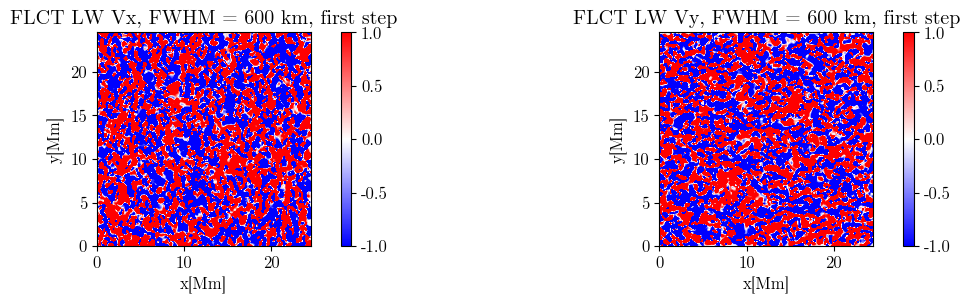

In [6]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(121)                                      # atmos[1] temp
plt.title("FLCT LW Vx, FWHM = 600 km, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_LW_600[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(122)                                      # atmos[1] temp
plt.title("FLCT LW Vy, FWHM = 600 km, first step")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vy_LW_600[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()


fig.tight_layout()
#plt.savefig("LW_nesto", dpi = 100)

In [7]:
HDU = fits.open("pyFLCT_fwhm_600_dt_30_LW500nmInte_tracked.fits")[0]

In [8]:
HDU.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1536                                                  
NAXIS2  =                 1536                                                  
NAXIS3  =                   30                                                  
EXTEND  =                    T                                                  
UNITS   = 'km/s    '                                                            
TRACKED = 'LW Intensity'                                                        
AUTHOR  = 'Teodor  '                                                            
FWHM    =                  600                                                  
PIXELS  =                   16                                                  
SIGMA   =    22.522522522522

<h3>Simulation velocities, cadence = 10 s, 361 steps</h3>

In [9]:
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [10]:
# Taking every third to match 30 s cadence
Vx_third = Vx[::3]
Vy_third = Vy[::3]

In [11]:
np.shape(Vx_third)

(121, 1536, 1536)

<h2>Time averaging</h2>

In [12]:
Vx_mean3_sim90 = temporal_avg(Vx_third, 0, 90)
Vx_mean3_sim90 = Vx_mean3_sim90/1E5

Vy_mean3_sim90 = temporal_avg(Vy_third, 0, 90)
Vy_mean3_sim90 = Vy_mean3_sim90/1E5

In [13]:
Vx_LW = temporal_avg(Vx_LW_600, 0, 90)
Vy_LW = temporal_avg(Vy_LW_600, 0, 90)

<h4>Gaussian filter</h4>

In [14]:
Vx_30filtered22 = gaussian_filter(Vx_mean3_sim90, 22.5/np.sqrt(2), mode = "wrap")
Vy_30filtered22 = gaussian_filter(Vy_mean3_sim90, 22.5/np.sqrt(2), mode = "wrap")

<h2>Comparison - sim vs. tracked LW</h2>

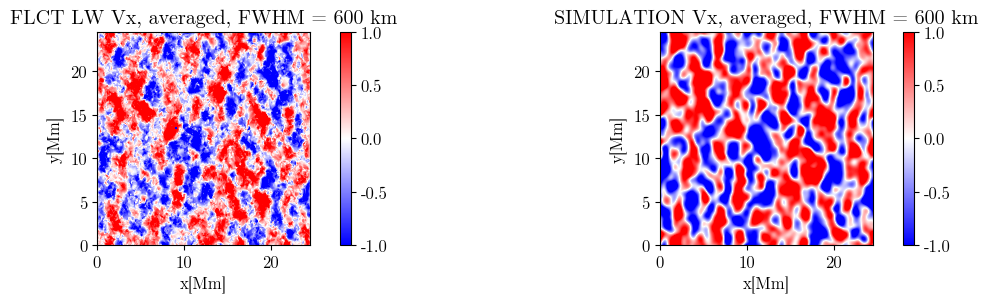

In [15]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(121)                                      # atmos[1] temp
plt.title("FLCT LW Vx, averaged, FWHM = 600 km")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_LW[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(122)                                      # atmos[1] temp
plt.title("SIMULATION Vx, averaged, FWHM = 600 km")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_30filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()


fig.tight_layout()
#plt.savefig("LW_nesto", dpi = 100)

<h4>Pearson's correlation coefficient</h4>

In [16]:
Rx = pearsonr(Vx_LW.flatten(), Vx_30filtered22.flatten())
print(Rx)

PearsonRResult(statistic=0.21272458344807033, pvalue=0.0)


In [17]:
Ry = pearsonr(Vy_LW.flatten(), Vy_30filtered22.flatten())
print(Ry)

PearsonRResult(statistic=0.41245033003205755, pvalue=0.0)


<h3>FLCT Intensity velocities</h3>

In [18]:
Vx_tracked_600_30 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[0].data
Vy_tracked_600_30 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[1].data

In [19]:
Vx_mean600_30_sim90 = temporal_avg(Vx_tracked_600_30, 0, 90)
Vy_mean600_30_sim90 = temporal_avg(Vy_tracked_600_30, 0, 90)

<h2>Comparison - sim vs. tracked LW vs. tracked Intensity</h2>

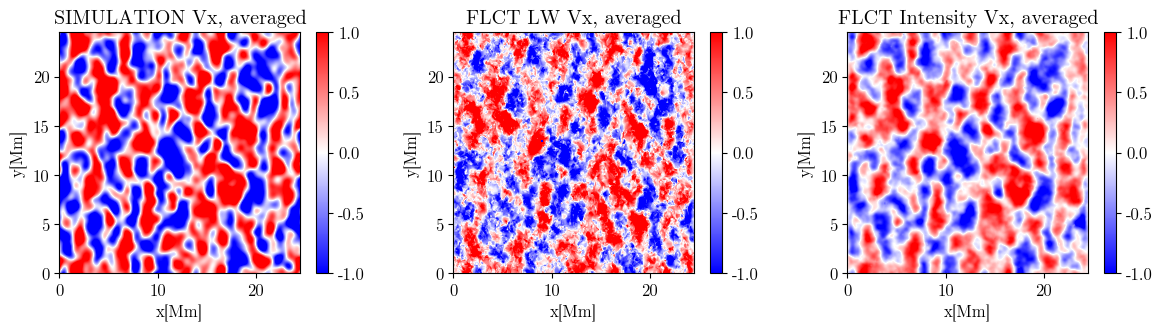

In [20]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("SIMULATION Vx, averaged")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_30filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("FLCT LW Vx, averaged")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_LW[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()


plt.subplot(133)                                      # atmos[1] temp
plt.title("FLCT Intensity Vx, averaged")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_mean600_30_sim90[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

fig.tight_layout()
plt.savefig("SIM_LW_INTE.png", dpi = 100)

In [21]:
Rx_sim_Lw = pearsonr(Vx_30filtered22.flatten(), Vx_LW.flatten())
print(Rx_sim_Lw)

PearsonRResult(statistic=0.21272458344807033, pvalue=0.0)


In [22]:
Rx_sim_Inte = pearsonr(Vx_30filtered22.flatten(), Vx_mean600_30_sim90.flatten())
print(Rx_sim_Inte)

PearsonRResult(statistic=0.9406866345868102, pvalue=0.0)


In [23]:
Rx_Lw_Inte = pearsonr(Vx_LW.flatten(), Vx_mean600_30_sim90.flatten())
print(Rx_Lw_Inte)

PearsonRResult(statistic=0.22262158348125316, pvalue=0.0)
